In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products  = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

In [4]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [11]:
customers['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [12]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [13]:
products['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [14]:
products['ProductName'].unique()

array(['ActiveWear Biography', 'ActiveWear Smartwatch',
       'ComfortLiving Biography', 'BookWorld Rug', 'TechPro T-Shirt',
       'ActiveWear Rug', 'SoundWave Cookbook',
       'BookWorld Bluetooth Speaker', 'BookWorld Wall Art',
       'ComfortLiving Smartwatch', 'SoundWave Desk Lamp',
       'ComfortLiving Headphones', 'BookWorld Smartwatch',
       'ActiveWear Jacket', 'HomeSense Headphones',
       'ActiveWear Running Shoes', 'ActiveWear Textbook',
       'ComfortLiving Mystery Book', 'ComfortLiving Sweater',
       'SoundWave Rug', 'HomeSense Wall Art', 'ActiveWear Cookware Set',
       'SoundWave Bluetooth Speaker', 'SoundWave Headphones',
       'HomeSense Desk Lamp', 'TechPro Headphones', 'ActiveWear Cookbook',
       'BookWorld Cookbook', 'HomeSense T-Shirt', 'ActiveWear T-Shirt',
       'BookWorld Jacket', 'SoundWave Smartwatch', 'TechPro Vase',
       'TechPro Smartwatch', 'SoundWave Mystery Book',
       'ComfortLiving Smartphone', 'ActiveWear Headphones',
       'SoundW

In [15]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [16]:
# Merge data for EDA
merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")

In [17]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


# Exploratory Data Analysis

In [18]:
merged_data.drop(columns = 'Price_y',inplace = True)
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


In [22]:
merged_data.rename(columns = {'Price_x':'Price_of_1'}, inplace = True)

In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_of_1       1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [28]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_of_1       1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [29]:
# Statistical Summary
print("\nStatistical Summary:")
print(merged_data.describe())


Statistical Summary:
                     TransactionDate     Quantity   TotalValue  Price_of_1  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate  
count                           1000  
mean   2023-07-09 02:49:55.199999744  
min              2022-01-22 00:00:00  
25%              2022-09-17 12:00:00  
50%              2023-07-23 00:00:00  
75%              2024-04-12 00:00:00  
ma

In [33]:
# Sample Data
print("\nSample Data:")
print(merged_data.sample(8))


Sample Data:
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
808        T00266      C0125      P099 2024-02-27 18:25:58         2   
875        T00805      C0038      P075 2024-02-05 18:18:43         3   
901        T00370      C0143      P094 2024-07-17 08:52:39         3   
830        T00911      C0067      P020 2024-06-14 21:37:11         3   
253        T00079      C0147      P051 2024-05-09 16:33:17         1   
679        T00506      C0053      P006 2024-09-18 23:31:26         1   
744        T00329      C0008      P035 2024-12-17 04:05:00         4   
349        T00345      C0140      P050 2024-08-07 09:24:39         4   

     TotalValue  Price_of_1     CustomerName         Region SignupDate  \
808      708.58      354.29  Nicholas Taylor  North America 2022-12-18   
875     1493.28      497.76  Jeffrey Perkins  North America 2022-04-16   
901     1342.02      447.34     Brian Parker           Asia 2024-05-27   
830     1189.02      396.34    Carl Gonza

# Insights Generations

# 1. Ranking of total Regions by Total Values

In [34]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nTop Regions by Sales:")
print(region_sales.head())


Top Regions by Sales:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


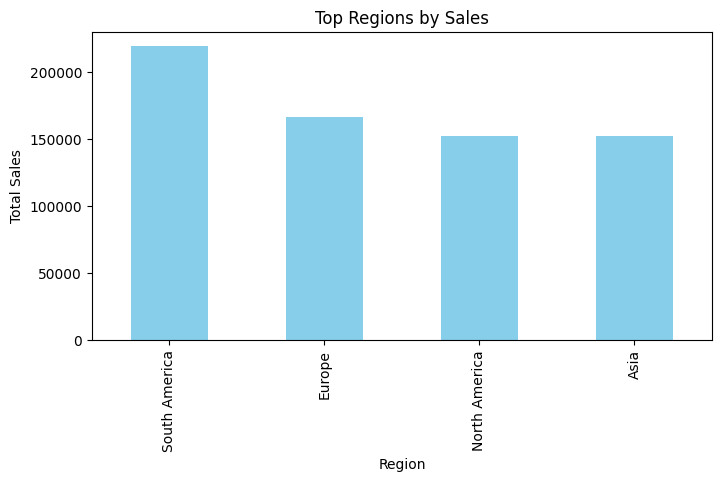

In [37]:
# Visualize Top Regions by Sales
plt.figure(figsize=(8, 4))
region_sales.plot(kind='bar', color='skyblue', title='Top Regions by Sales')
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

##  2. Most Popular Products by Quantity Sold

In [38]:
popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
print("\nMost Popular Products:")
print(popular_products.head())


Most Popular Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


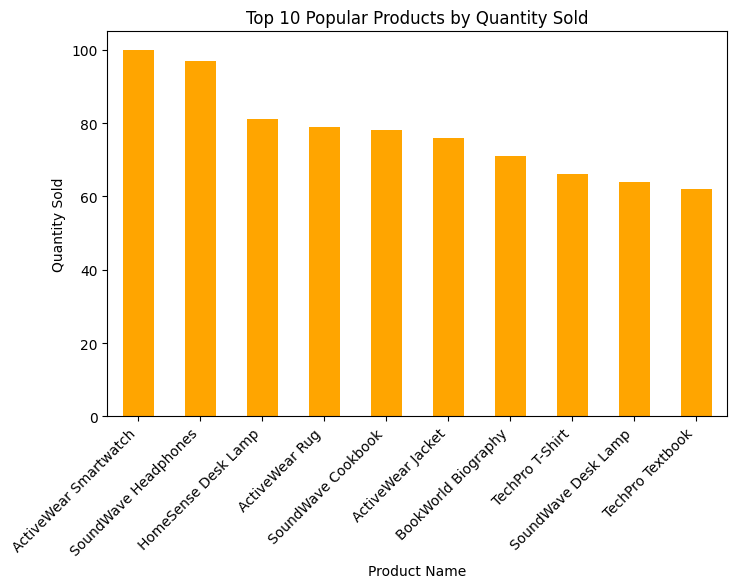

In [40]:
# Visualize Most Popular Products
plt.figure(figsize=(8, 5))
popular_products.head(10).plot(kind='bar', color='orange', title='Top 10 Popular Products by Quantity Sold')
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.show()

## 3. Sales Trend Over Time

In [41]:
sales_trend = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
print("\nMonthly Sales Trend:")
print(sales_trend)


Monthly Sales Trend:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


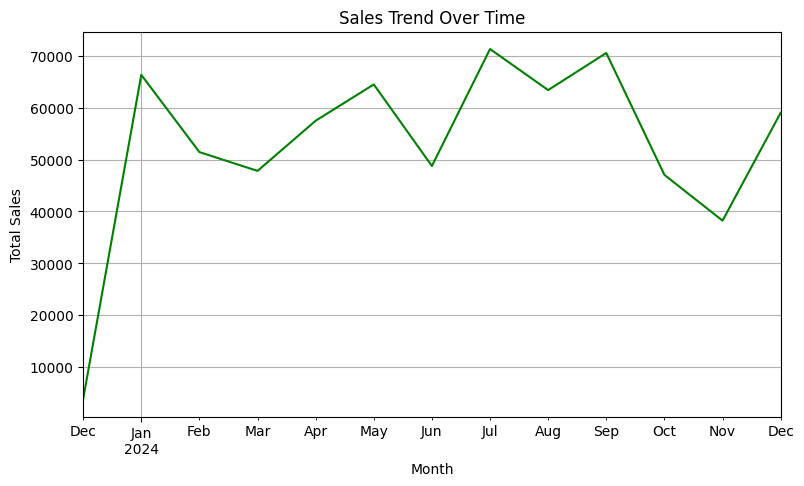

In [45]:
# Visualize Sales Trend Over Time
sales_trend.plot(kind="line", title="Sales Trend Over Time", xlabel="Month", ylabel="Total Sales", figsize=(9, 5), color='green')
plt.grid(True)
plt.show()

##  4. Average Spending per Customer

In [46]:
avg_spending = merged_data.groupby("CustomerID")["TotalValue"].mean().sort_values(ascending=False)
print("\nTop Customers by Average Spending:")
print(avg_spending.head())


Top Customers by Average Spending:
CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
Name: TotalValue, dtype: float64


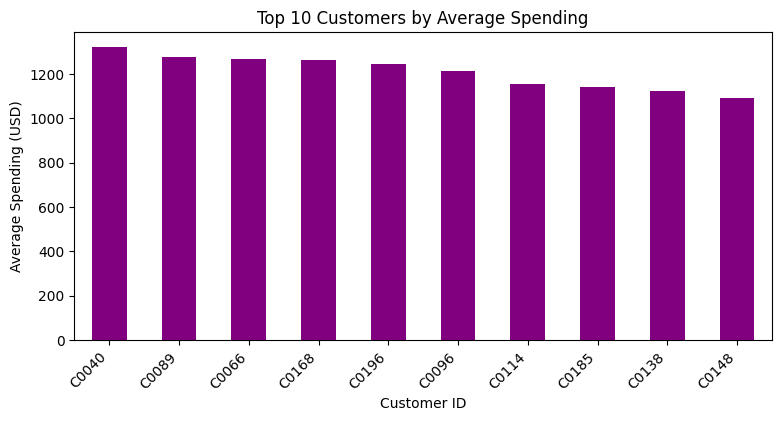

In [48]:
# Visualize Top Customers by Average Spending
plt.figure(figsize=(9, 4))
avg_spending.head(10).plot(kind='bar', color='purple', title='Top 10 Customers by Average Spending')
plt.xlabel("Customer ID")
plt.ylabel("Average Spending (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Product Categories by Revenue

In [49]:
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(category_revenue)


Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


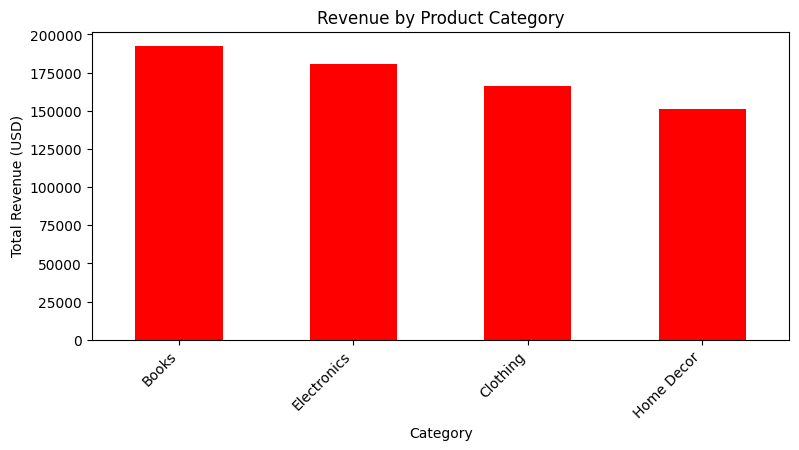

In [51]:
# Visualize Revenue by Product Category
plt.figure(figsize=(9, 4))
category_revenue.plot(kind='bar', color='red', title='Revenue by Product Category')
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

## 6. Correlation Analysis

In [52]:
numeric_columns = merged_data.select_dtypes(include=np.number).corr()
print("\nCorrelation Matrix:")
print(numeric_columns)


Correlation Matrix:
            Quantity  TotalValue  Price_of_1
Quantity    1.000000    0.609972   -0.009378
TotalValue  0.609972    1.000000    0.722714
Price_of_1 -0.009378    0.722714    1.000000


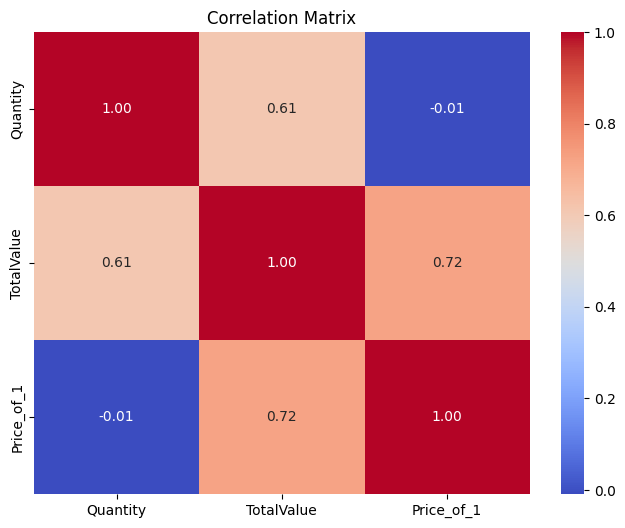

In [53]:
# Visualize Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
